In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate B-field as function of (x,y) for 1 current loop; Lx for x, Ly for y, dx, dy
def B_Field_1_Coil(Lx,Ly,dx,dy):
    outfile = open("B_Field_1_Coil.dat", "w") # outfile

    increment = 0.05

    # iterates over x and y axes
    for y in np.arange(-Ly,Ly,dy):
        for x in np.arange(-Lx,Lx,dx):
            B = 0

            for i in np.arange(0,2*np.pi,increment): # around loop
                dl = increment*np.asarray([0.0,-np.sin(i),np.cos(i)]) # loop element
                r = [-x,np.cos(i)-y,np.sin(i)] # position of loop element
                r_amp = np.sqrt(np.dot(r,r)) # amplitude of distance
                dl_cross_r = np.cross(dl,r)
                
                dB = -(1/(4*np.pi*(r_amp**3)))*dl_cross_r
                B += dB
                
            B_amp = np.dot(B,B)**0.5
            
            # high field values near the loops are ignored to prevent divergence of 1/r^3 term
            if B_amp >= 1.0:
                B[0] = 0
                B[1] = 0
                
            # output for every x,y
            outfile.write(str(y) + "," + str(x) + "," + str(B[0]) + "," +
            str(B[1]) + "," + str(B[2]) + "," + str(B_amp) +"\n")
    outfile.close()

    # plot as a vector plot
    y2,x2,Bx,By,Bz,BT = np.loadtxt('B_Field_1_Coil.dat',delimiter=',',unpack=True)

    plt.quiver(x2,y2,Bx,By,scale=10)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.savefig('Magnetic_field_vectors_as_a_function_of_position_about_a_current_loop_at_origin.pdf')


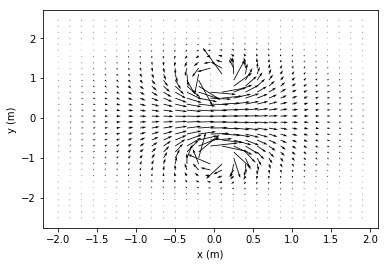

In [3]:
B_Field_1_Coil(2,2.5,0.15,0.15)